# Einladen

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import pandas as pd
from scipy.stats import linregress
%matplotlib inline

In [127]:
class gas:
    def __init__(self,path) -> None:
        self.df=pd.read_csv(path)
        self.df.astype(float)
    def membran(self,stop):
        reg_membran = linregress(np.array(self.df["Bara1"][:stop]),np.array(self.df["Membran"][:stop]))
        f_reg_membran = lambda x: reg_membran.slope*x+reg_membran.intercept

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Membran-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Membran}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara1"][:stop],self.df["Membran"][:stop],c="C0",label="Gemessener Druck")
        fig1.plot(self.df["Bara1"][:stop],f_reg_membran(self.df["Bara1"][:stop]),c="C0",label="Lineare Regression")
        plt.tight_layout()
        plt.show()
    def pirani(self,start):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara1"],self.df["Pirani"],c="C0",label="Gemessener Druck")
        plt.tight_layout()
        # plt.legend()
        plt.show()

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 2}}$")
        fig1.scatter(self.df["Bara2"][start:],self.df["Pirani"][start:],c="C0",label="Gemessener Druck P")
        # fig1.set_xscale("log")
        plt.tight_layout()
        # plt.legend()
        plt.show()
    def ionivac_penning(self,start):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Penning und Ionivac-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara2"][start:],self.df["Penning1"][start:],c="C0",label="Penning")
        fig1.scatter(self.df["Bara2"][start:],self.df["Ionivac"][start:],c="C1",label="Ionivac")
        plt.tight_layout()
        plt.legend()
        plt.show()

In [128]:
class gas_together:
    def __init__(self,path,path2) -> None:
        self.df=pd.read_csv(path)
        self.df.astype(float)
        self.df2=pd.read_csv(path2)
        self.df2.astype(float)
    def membran(self,stop,stop2):
        reg_membran = linregress(np.array(self.df["Bara1"][:stop]),np.array(self.df["Membran"][:stop]))
        f_reg_membran = lambda x: reg_membran.slope*x+reg_membran.intercept

        reg_membran2 = linregress(np.array(self.df2["Bara1"][:stop2]),np.array(self.df2["Membran"][:stop2]))
        f_reg_membran2 = lambda x: reg_membran2.slope*x+reg_membran2.intercept

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Membran-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Membran}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara1"][:stop],self.df["Membran"][:stop],c="C0",label="Gemessener Druck Luft")
        fig1.plot(self.df["Bara1"][:stop],f_reg_membran(self.df["Bara1"][:stop]),c="C0",label="Lineare Regression Luft")
        fig1.scatter(self.df2["Bara1"][:stop],self.df2["Membran"][:stop],c="C1",label="Gemessener Druck Helium")
        fig1.plot(self.df2["Bara1"][:stop],f_reg_membran2(self.df2["Bara1"][:stop]),c="C1",label="Lineare Regression Helium")
        plt.tight_layout()
        plt.legend()
        plt.show()
    def pirani(self,start,start2):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara1"],self.df["Pirani"],c="C0",label="Luft")
        fig1.scatter(self.df2["Bara1"],self.df2["Pirani"],c="C1",label="Helium")
        plt.tight_layout()
        plt.legend()
        plt.show()

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 2}}$")
        fig1.scatter(self.df["Bara2"][start:],self.df["Pirani"][start:],c="C0",label="Luft")
        fig1.scatter(self.df2["Bara2"][start2:],self.df2["Pirani"][start2:],c="C1",label="Helium")
        # fig1.set_xscale("log")
        plt.tight_layout()
        plt.legend()
        plt.show()
    def ionivac_penning(self,start,start2):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Penning und Ionivac-Vakuumeter")
        fig1.set_ylabel(r"$p$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara2"][start:],self.df["Penning1"][start:],c="C0",label="Penning Luft")
        fig1.scatter(self.df["Bara2"][start:],self.df["Ionivac"][start:],c="C1",label="Ionivac Luft")
        fig1.scatter(self.df2["Bara2"][start2:],self.df2["Penning1"][start2:],c="C2",label="Penning Helium")
        fig1.scatter(self.df2["Bara2"][start2:],self.df2["Ionivac"][start2:],c="C3",label="Ionivac Helium")
        plt.tight_layout()
        plt.legend()
        plt.show()

# Luft

## Init

In [129]:
luft=gas("data/vakuumeter/Luft.csv")

## Membran

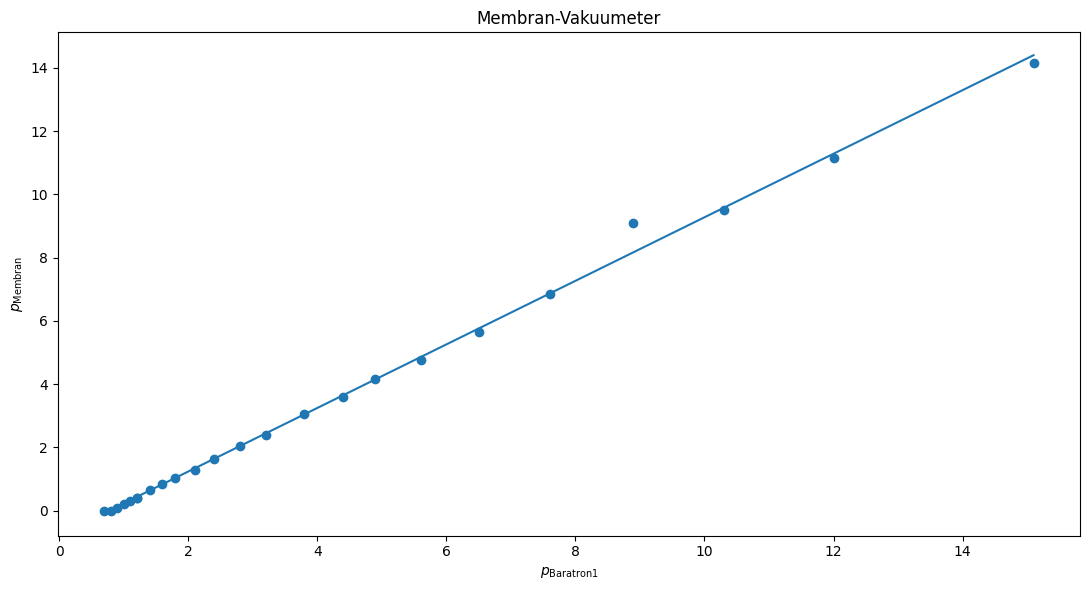

In [130]:
luft.membran(24)

## Pirani

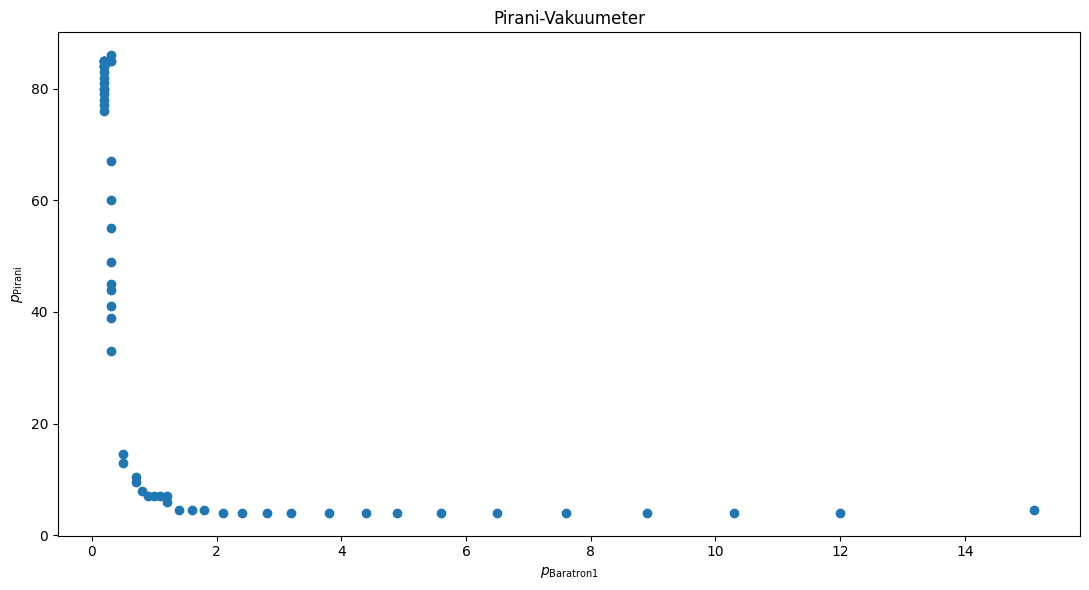

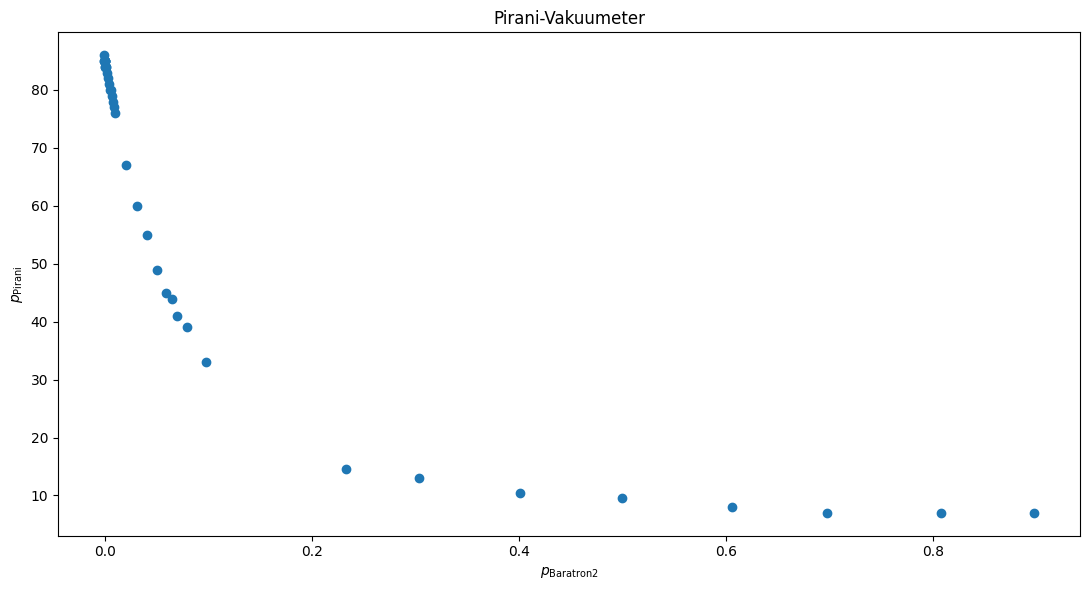

In [131]:
luft.pirani(19)

## Ionivac und Penning

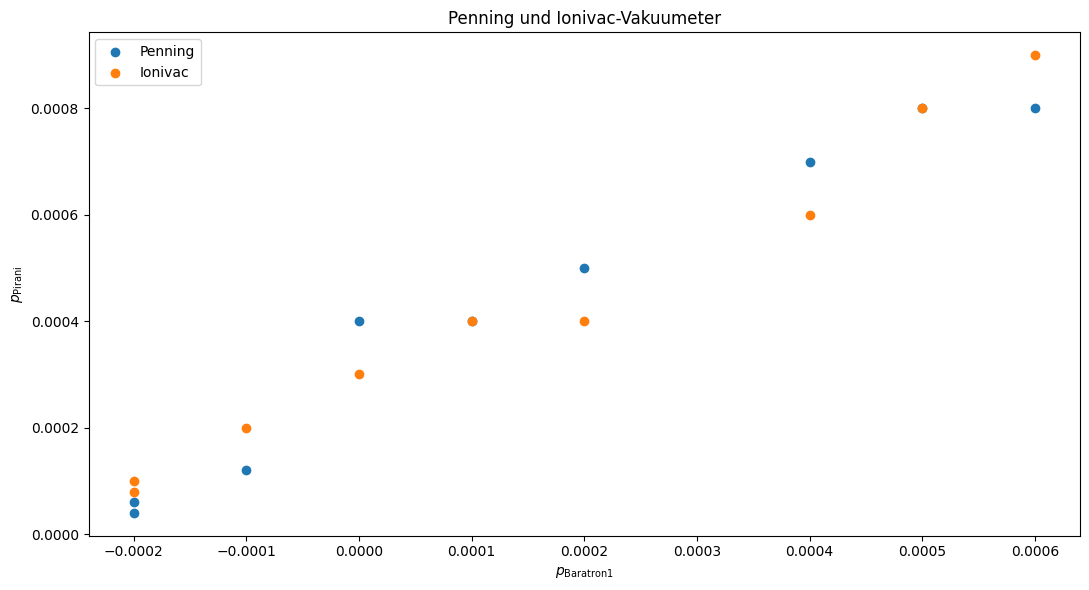

In [132]:
luft.ionivac_penning(48)

# Helium

## Init

In [133]:
helium=gas("data/vakuumeter/Helium.csv")

## Membran

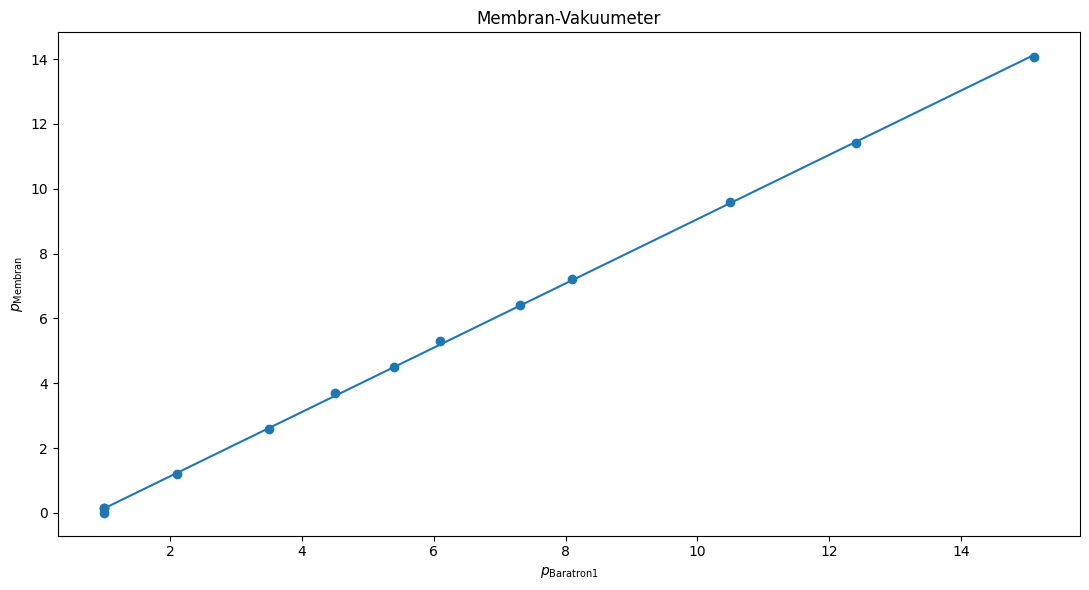

In [134]:
helium.membran(13)

## Pirani

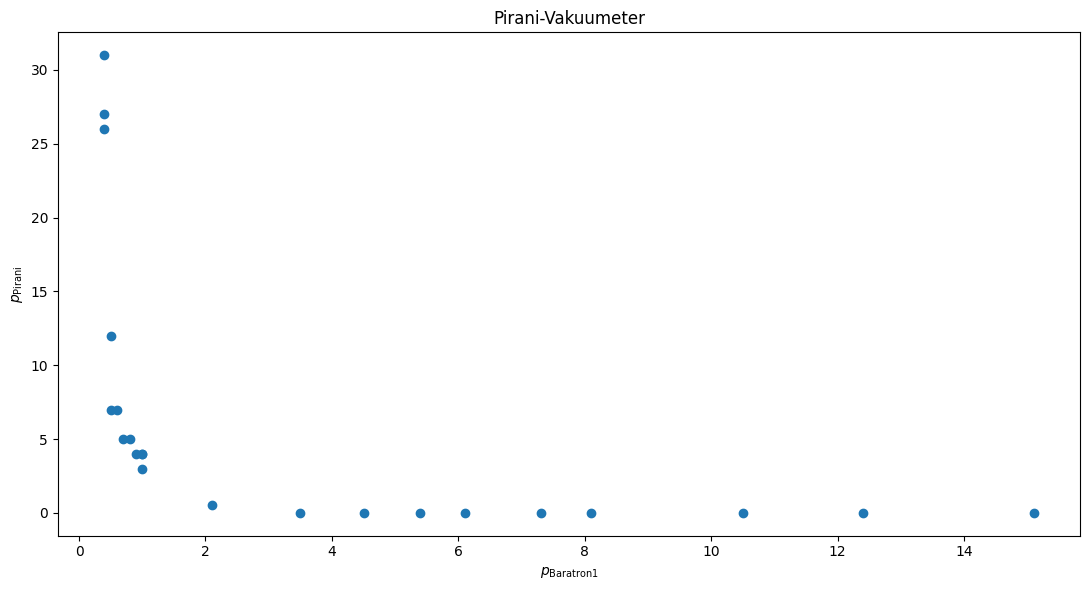

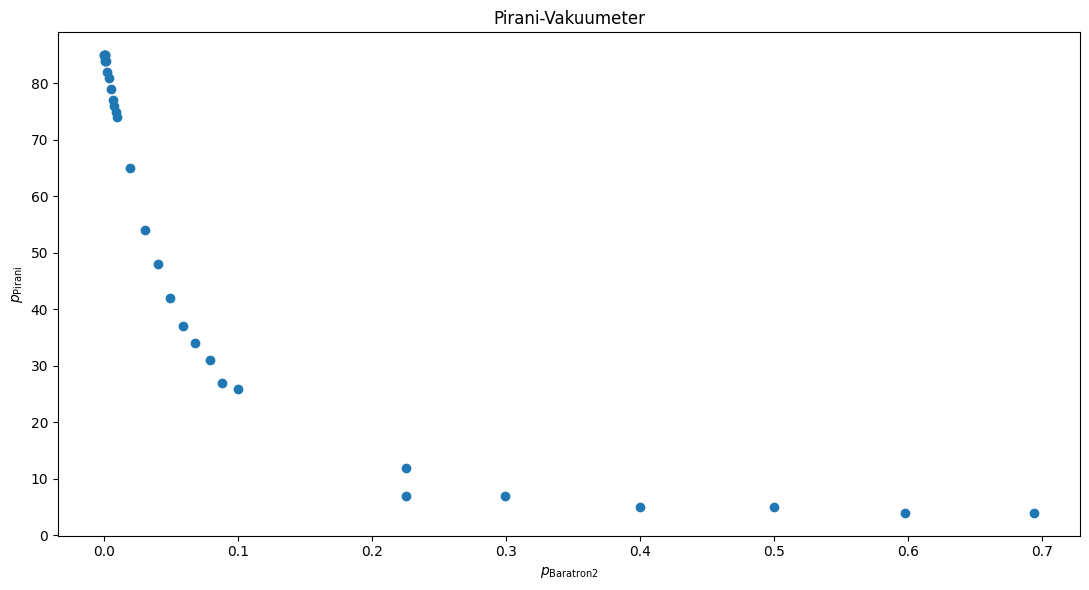

In [135]:
helium.pirani(12)

# Beide

In [136]:
beide=gas_together("data/vakuumeter/Luft.csv","data/vakuumeter/Helium.csv")

## Membran

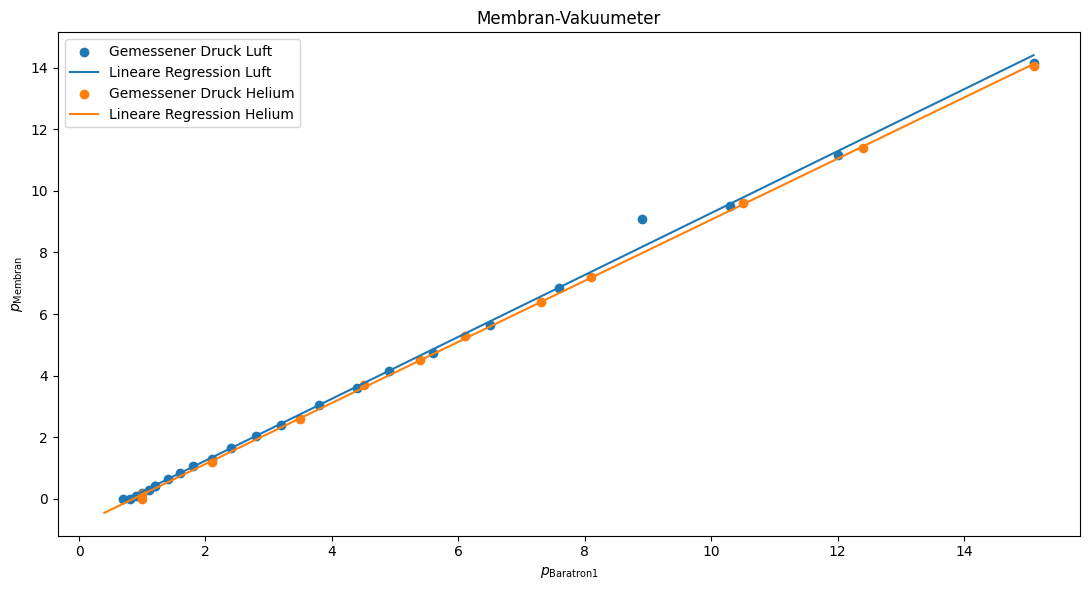

In [137]:
beide.membran(24,13)

## Pirani

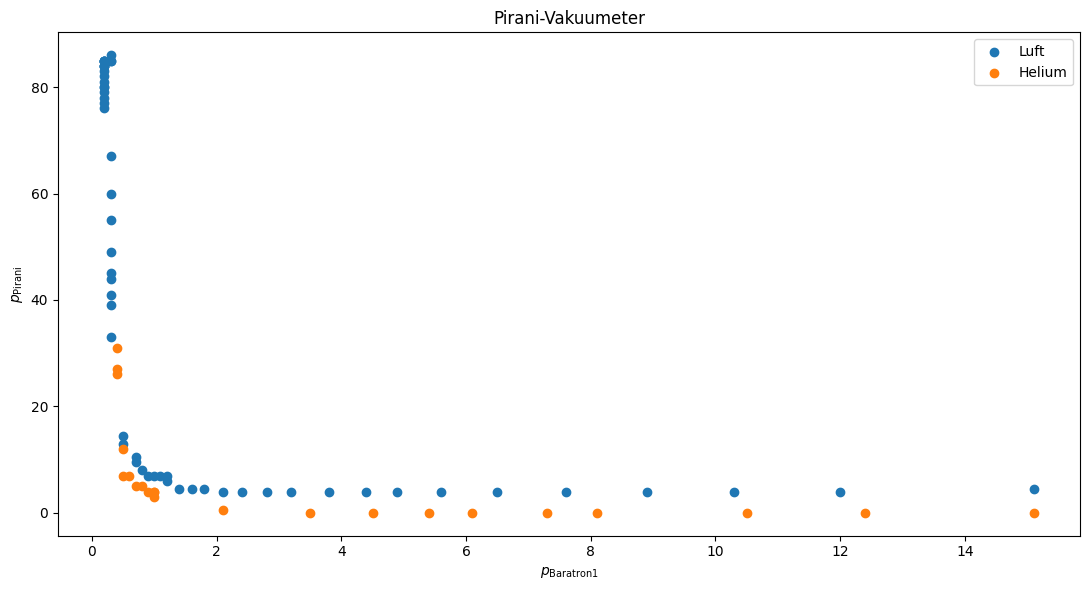

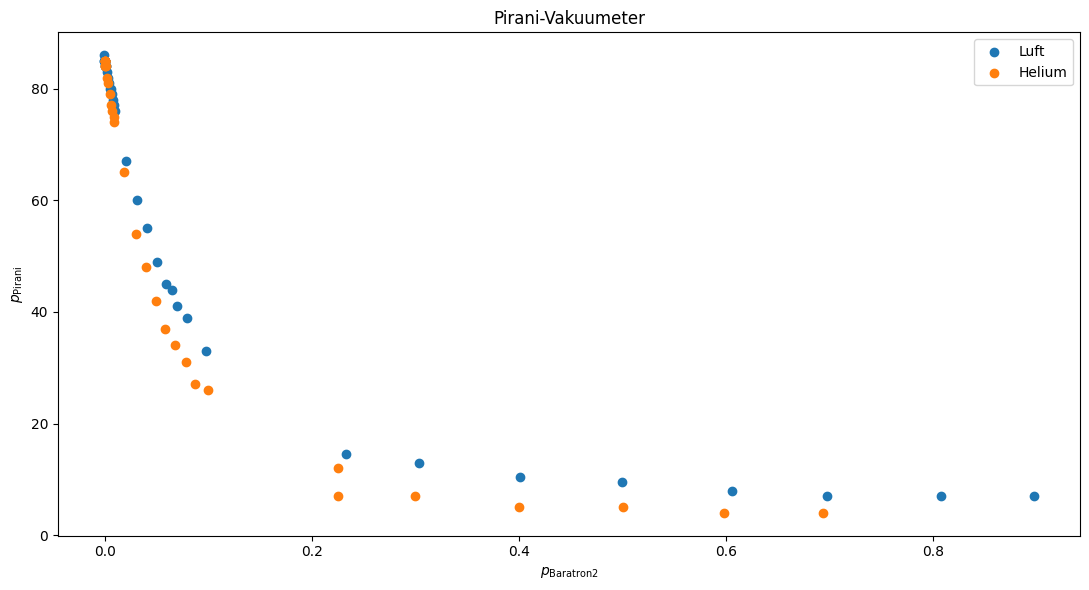

In [138]:
beide.pirani(19,12)

## Ionivac und Penning

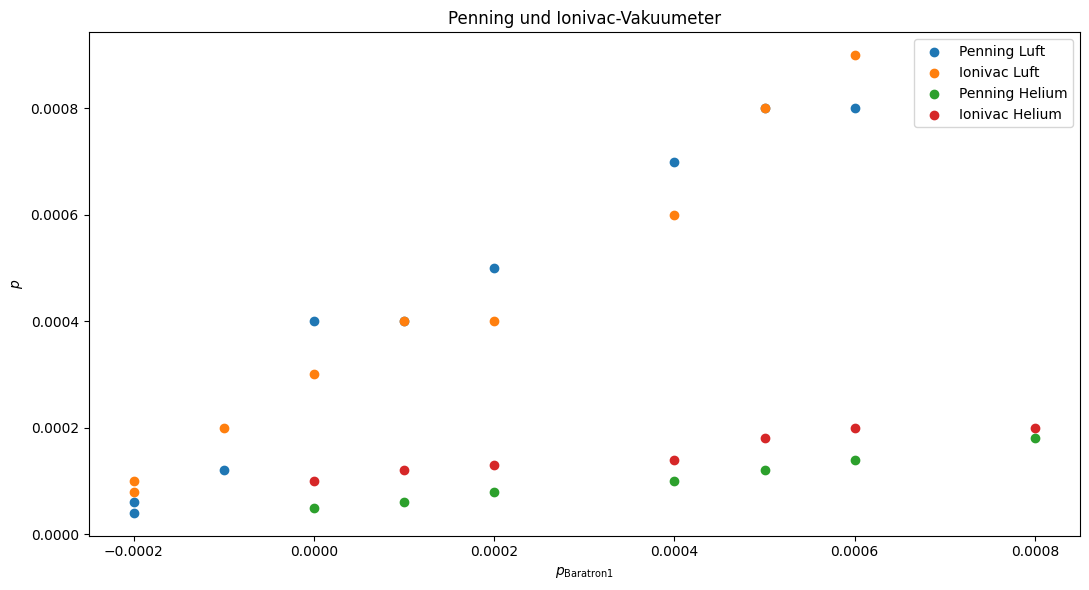

In [139]:
beide.ionivac_penning(48,36)